<a href="https://colab.research.google.com/github/Persepshun/DataScienceInternship/blob/main/recycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import re
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt


In [8]:
recycle = pd.read_csv("/content/Recycling_Diversion_and_Capture_Rates_20240614.csv")

In [9]:
recycle.head()

,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate-Total (Total Recycling / Total Waste),Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100
0,Brooklyn North,BKN01,10,2019,April,14.7,44.9,43.0,44.1
1,Brooklyn North,BKN02,10,2019,April,20.0,34.2,57.9,41.2
2,Brooklyn North,BKN03,10,2019,April,12.2,33.5,44.9,38.2
3,Brooklyn North,BKN04,10,2019,April,15.5,35.2,68.5,48.8
4,Brooklyn North,BKN05,10,2019,April,10.1,22.3,45.1,31.5


In [10]:
def col_formatter(x):
  xs = re.split(r"\({1,2}", x)[0].lower().strip()
  xs = re.sub("\s|-", "_", xs)
  return xs

recycle.columns = [col_formatter(c) for c in recycle.columns]

In [11]:
recycle.describe(include="all")

,zone,district,fiscal_month_number,fiscal_year,month_name,diversion_rate_total,capture_rate_paper,capture_rate_mgp,capture_rate_total
count,2832,2832,2832.000000,2832.000000,2832,2832.000000,2832.000000,2832.000000,2832.000000
unique,7,59,NaN,NaN,12,NaN,NaN,NaN,NaN
top,Bronx,BKN01,NaN,NaN,April,NaN,NaN,NaN,NaN
freq,576,48,NaN,NaN,236,NaN,NaN,NaN,NaN
mean,NaN,NaN,6.500000,2017.500000,NaN,17.483792,38.430191,61.224223,46.157345
std,NaN,NaN,3.452662,1.118231,NaN,5.264288,9.013759,16.283391,9.496978
min,NaN,NaN,1.000000,2016.000000,NaN,5.900000,16.900000,20.400000,18.500000
25%,NaN,NaN,3.750000,2016.750000,NaN,13.800000,31.900000,48.400000,39.700000
50%,NaN,NaN,6.500000,2017.500000,NaN,16.900000,37.750000,61.600000,46.300000
75%,NaN,NaN,9.250000,2018.250000,NaN,21.000000,45.200000,74.425000,52.625000


In [12]:
def date_formatter(yr, mo):
  d = dt.datetime.strptime(f"{yr}-{mo}", "%Y-%B").date()
  return d

In [13]:
recycle["date"] = recycle.apply(lambda df: date_formatter(df.fiscal_year, df.month_name), axis=1)

recycle["calendar_month"] = recycle.date.apply(lambda x: x.month)

In [14]:
recycle.head()

,zone,district,fiscal_month_number,fiscal_year,month_name,diversion_rate_total,capture_rate_paper,capture_rate_mgp,capture_rate_total,date,calendar_month
0,Brooklyn North,BKN01,10,2019,April,14.7,44.9,43.0,44.1,2019-04-01,4
1,Brooklyn North,BKN02,10,2019,April,20.0,34.2,57.9,41.2,2019-04-01,4
2,Brooklyn North,BKN03,10,2019,April,12.2,33.5,44.9,38.2,2019-04-01,4
3,Brooklyn North,BKN04,10,2019,April,15.5,35.2,68.5,48.8,2019-04-01,4
4,Brooklyn North,BKN05,10,2019,April,10.1,22.3,45.1,31.5,2019-04-01,4


In [15]:
rzm = (recycle
       .groupby(["zone", "month_name", "calendar_month"])["diversion_rate_total"]
       .mean()
       .reset_index()
       .sort_values(["zone", "calendar_month"]))

In [16]:
rzm.head()

,zone,month_name,calendar_month,diversion_rate_total
4,Bronx,January,1,14.304167
3,Bronx,February,2,13.847917
7,Bronx,March,3,13.583333
0,Bronx,April,4,13.658333
8,Bronx,May,5,13.425000


In [17]:
def month_name(x):
  return dt.date(2020, x, 1).strftime("%B")

<Axes: xlabel='calendar_month', ylabel='zone'>

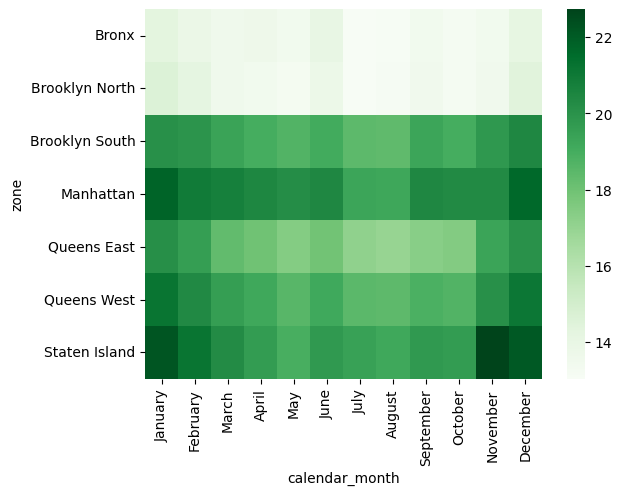

In [18]:
df = rzm.pivot(index="zone", columns=["calendar_month"], values="diversion_rate_total")

sns.heatmap(df, xticklabels=[month_name(c) for c in df.columns.to_list()], cmap="Greens")

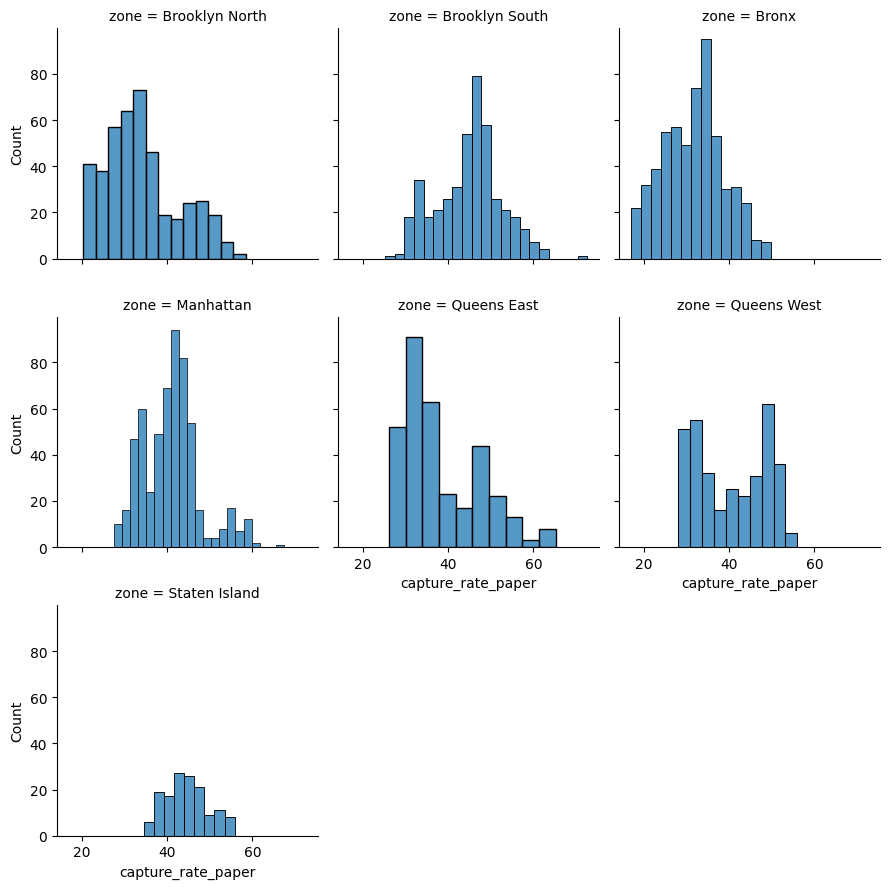

In [19]:
g = sns.FacetGrid(recycle, col="zone", col_wrap=3)
g.map_dataframe(sns.histplot, x="capture_rate_paper")


# sns.histplot(recycle, x="capture_rate_paper", hue="zone")

In [20]:
rzm = (recycle
       .groupby(["fiscal_year", "zone"])["diversion_rate_total"]
       .mean()
       .reset_index()
       .sort_values(["fiscal_year", "zone"]))

<Axes: xlabel='fiscal_year', ylabel='diversion_rate_total'>

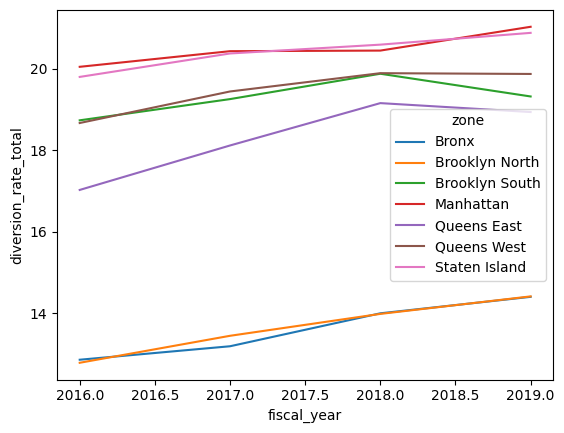

In [22]:
# Question 1
sns.lineplot(rzm, x="fiscal_year", y="diversion_rate_total", hue="zone")

**Assignment:**

1. Make a lineplot of mean capture_rate_paper from 2016-2019 grouped by zone and fiscal_year
2. What district had the highest average diversion_rate_total in each fiscal_year?
3. What district had the lowest average diversion_rate_total in each fiscal_year?
4. Make a barplot of annual mean capture_rate_paper for Brooklyn South and Brooklyn North combined into one "Brooklyn"
5. Extra credit: make a plot of your choice

In [28]:
filtered_data = recycle[(recycle["fiscal_year"] >= 2016) & (recycle["fiscal_year"] <= 2019)]

In [29]:
grouped_data = filtered_data.groupby(["zone", "fiscal_year"])["capture_rate_paper"].mean().reset_index()


Text(0.5, 1.0, 'Mean Capture Rate Paper from 2016-2019 by Zone and Fiscal Year')

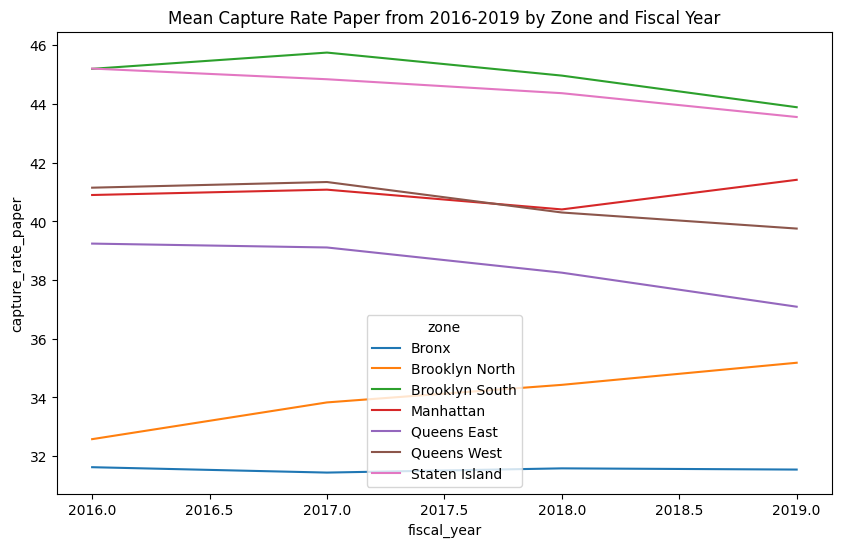

In [33]:
# Question 1
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x="fiscal_year", y="capture_rate_paper", hue="zone")

plt.title("Mean Capture Rate Paper from 2016-2019 by Zone and Fiscal Year")


In [35]:
# Question 2 - Highest is Manhattan overall.  In 2018 it was Staten Island, but the other three years were Manhattan.
grouped_diversion = recycle.groupby(["fiscal_year", "zone"])["diversion_rate_total"].mean().reset_index()
highest_diversion = grouped_diversion.loc[grouped_diversion.groupby("fiscal_year")["diversion_rate_total"].idxmax()]
highest_diversion

,fiscal_year,zone,diversion_rate_total
3,2016,Manhattan,20.047917
10,2017,Manhattan,20.431250
20,2018,Staten Island,20.591667
24,2019,Manhattan,21.029861


In [39]:
# Question 3 - Lowest overall is Bronx, with Brooklyn North closely tied.  In 2016 and 2018 the lowest was Brooklyn North, and in 2017 and 2019 it was the bronx.
grouped_diversion = recycle.groupby(["fiscal_year", "zone"])["diversion_rate_total"].mean().reset_index()
lowest_diversion = grouped_diversion.loc[grouped_diversion.groupby("fiscal_year")["diversion_rate_total"].idxmin()]
lowest_diversion

,fiscal_year,zone,diversion_rate_total
1,2016,Brooklyn North,12.787037
7,2017,Bronx,13.192361
15,2018,Brooklyn North,13.986111
21,2019,Bronx,14.404861


Text(0.5, 1.0, 'Annual Mean Capture Rate Paper for Brooklyn')

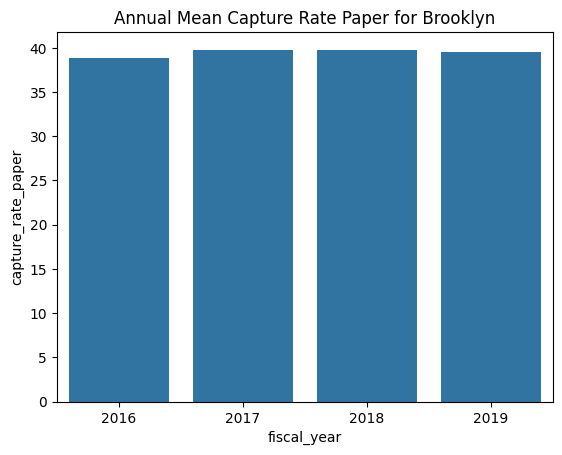

In [42]:
# Question 4 - See figure
recycle["zone"] = recycle["zone"].replace({"Brooklyn South": "Brooklyn", "Brooklyn North": "Brooklyn"})
brooklyn_data = recycle[recycle["zone"] == "Brooklyn"].groupby(["fiscal_year"])["capture_rate_paper"].mean().reset_index()
sns.barplot(data=brooklyn_data, x="fiscal_year", y="capture_rate_paper")
plt.title("Annual Mean Capture Rate Paper for Brooklyn")

Text(0.5, 1.02, 'Joint Plot of Capture Rate Total and Diversion Rate Total by Zone')

<Figure size 1000x600 with 0 Axes>

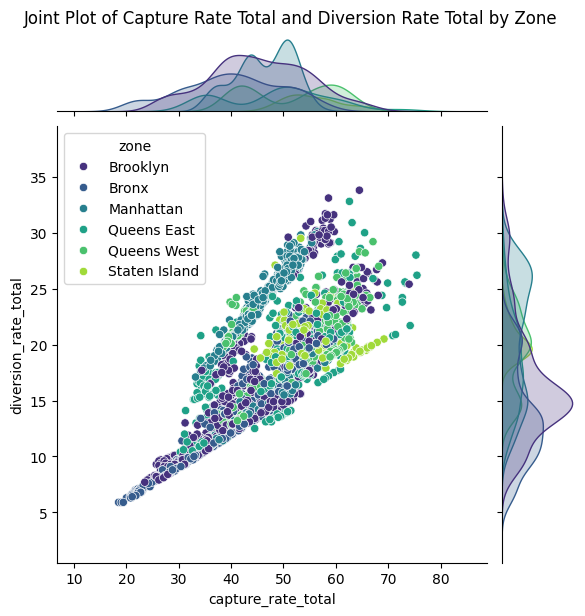

In [44]:
# Question 5 - See figure.  We did a plot of Capture rates over a fiscal year and Diversion rates over fiscal year, so I decided to do one of just Capture rate over diversion rate.
plt.figure(figsize=(10, 6))
sns.jointplot(data=recycle, x="capture_rate_total", y="diversion_rate_total", kind="scatter", hue="zone", palette="viridis")

plt.suptitle("Joint Plot of Capture Rate Total and Diversion Rate Total by Zone", y=1.02)